In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import make_regression

from pypal.plotting import make_jointplot
from pypal import PALCoregionalized, PALSklearn
from pypal.pal.utils import exhaust_loop
from pypal.models.gpr import build_coregionalized_model, _get_matern_52_kernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF 
import numpy as np

In [3]:
X, y = make_regression(n_targets=2, n_features=6, noise=0.1, n_informative=6)

In [4]:
indices = np.random.random_integers(0, len(y)-1, 30)

In [5]:
indices = np.unique(indices)

In [11]:
model_0 = GaussianProcessRegressor(RBF())
model_1 = GaussianProcessRegressor(RBF())

In [16]:
pal = PALSklearn(X, [model_0, model_1], 2, epsilon=[0.001, 0.001], beta_scale=2, delta=0.01)

 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/validate_inputs.py:145: UserWarning:No goals provided, will assume that every dimension should be maximized


In [17]:
pal.update_train_set(indices, y[indices])

In [18]:
pal.run_one_step()

 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/pal_base.py:345: UserWarning:The mean absolute error in crossvalidation is 35.50,
the mean variance is 0.36.
Your model might not be predictive and/or overconfident.
In the docs, you find hints on how to make GPRs more robust.


Done. No unclassified point left


In [9]:
exhaust_loop(pal, y)

 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/pal_base.py:345: UserWarning:The mean absolute error in crossvalidation is 64.29,
the mean variance is 0.36.
Your model might not be predictive and/or overconfident.
In the docs, you find hints on how to make GPRs more robust.


Done. No unclassified point left


 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/plotting/__init__.py:189: MatplotlibDeprecationWarning:
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/plotting/__init__.py:190: MatplotlibDeprecationWarning:
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


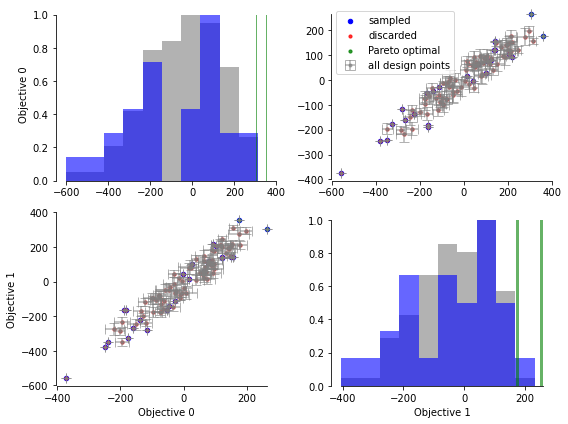

In [20]:
fig = make_jointplot(pal.means, pal)

In [21]:
fig.savefig('jointplot_example.png', dpi=400, bbox_inches='tight')